# $Zillow$ $Project$ $Final$ $Report$

# **Goals:**

* Discover key attributes that drive and have a high correlation with home value.

* Use those attributes to develop a machine learning model to predict home value.

    * Carefully select features that will prevent data leakage. 


## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
import model as m
import explore as e

# Acquire:

In [2]:
# acquire telco data 
df = w.get_zillow_data()

* Data acquire from Codeup Database 11/17/22

* It contained  52441 rows and 10 columns before cleaning

* Each row represents a single family household:
    * properties from 2017 with current transactions
    * located in the Californian counties of 'Los Angeles' or 'Orange'or 'Ventura'

* Each column represents a feature related to the single family residential.

###                                                        <h1><center>Data Dictionary</center></h1>     


|Feature          | Description|
| :---------------: | :---------------------------------- |
| home_value (target) | The total tax assessed value of the parcel  |
| squarefeet:  | Calculated total finished living area of the home |
| bathrooms:   |  Number of bathrooms in home including fractional bathrooms |
| bedrooms: | Number of bedrooms in home  |
| yearbuilt:  |  The Year the principal residence was built   |
| fireplace: | fireplace on property (if any = 1) |
| deck:  | deck on property (if any = 1) |
| pool:  | pool on property (if any = 1) |
| garage: | garage on property (if any = 1) |
| county: | FIPS code for californian counties: 6111 Ventura County, 6059  Orange County, 6037 Los Angeles County |
| home_age: | The age of the home in 2017   |
|optional_features: |If a home has any of the follwing: fireplace, deck, pool, garage it is noted as 1   |
|additional features: | 	Encoded and values for categorical data

# Prepare:

In [3]:
# prepare data 
df = w.zillow_prep(df)

In [4]:
# split data: train, validate and test
train, validate, test = w.split_data(df)

prepare actions:
* After the follwing steps I retained 95.9% of original data:
    * Outliers were removed
    (to better fit the definition of Single Family Property):
    
        * Beds above 6 
        * Baths above 6 
        * Home values above 1_750_000
        * Rows with both 0 beds and 0 baths 
        
    * For the following features it was assumed null values meant the structure did not exist on property:
        * fireplace (45198)
        * deck (52052)
        * pool (41345)
        * garage (34425)
            
    * The following null values were dropped:
        * home_value (1)
        * squarefeet (82)
        * yearbuilt (116)

* Encoded categorical variables
* Split data into train, validate and test 
    * Approximately: train 56%, validate 24%, test 20%
  


# Looking at the data

In [5]:
train.head(10)

,home_value,squarefeet,bathrooms,bedrooms,yearbuilt,fireplace,deck,pool,garage,county,home_age,optional_features,los_angeles_county,orange_county,ventura_county
32899,346258.0,1026.0,1.0,2.0,1924.0,0.0,0.0,0.0,0.0,6037.0,93.0,0,1,0,0
4511,520000.0,1728.0,2.0,3.0,1987.0,0.0,0.0,0.0,0.0,6037.0,30.0,0,1,0,0
29470,217589.0,1840.0,2.0,4.0,1973.0,0.0,0.0,0.0,1.0,6059.0,44.0,0,0,1,0
15398,210507.0,2581.0,3.0,4.0,1994.0,0.0,0.0,1.0,0.0,6037.0,23.0,1,1,0,0
14156,294263.0,902.0,2.0,2.0,1950.0,0.0,0.0,0.0,0.0,6037.0,67.0,0,1,0,0
32788,241475.0,1719.0,2.5,3.0,1992.0,1.0,0.0,0.0,1.0,6111.0,25.0,1,0,0,1
19187,108271.0,2018.0,3.0,3.0,1960.0,0.0,0.0,1.0,0.0,6037.0,57.0,1,1,0,0
29240,243917.0,2542.0,3.0,3.0,1955.0,0.0,0.0,0.0,0.0,6037.0,62.0,0,1,0,0
24385,482506.0,1668.0,2.0,3.0,1979.0,0.0,0.0,1.0,1.0,6059.0,38.0,1,0,1,0
46165,413000.0,1351.0,2.0,3.0,1954.0,0.0,0.0,0.0,0.0,6037.0,63.0,0,1,0,0


# Data Summary

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
home_value,28159.0,435017.576015,332865.944266,3254.0,187537.5,362951.0,583900.5,1750000.0
squarefeet,28159.0,1832.225576,803.292556,300.0,1256.0,1633.0,2227.0,8251.0
bathrooms,28159.0,2.228506,0.884596,1.0,2.0,2.0,3.0,6.0
bedrooms,28159.0,3.273483,0.886781,1.0,3.0,3.0,4.0,6.0
yearbuilt,28159.0,1963.118719,22.663952,1878.0,1950.0,1960.0,1978.0,2015.0
fireplace,28159.0,0.141376,0.348415,0.0,0.0,0.0,0.0,1.0
deck,28159.0,0.006925,0.082929,0.0,0.0,0.0,0.0,1.0
pool,28159.0,0.204020,0.402991,0.0,0.0,0.0,0.0,1.0
garage,28159.0,0.344259,0.475135,0.0,0.0,0.0,1.0,1.0
county,28159.0,6049.246031,21.220257,6037.0,6037.0,6037.0,6059.0,6111.0


# Explore:

## How do home features of a home influence home value?

  * Specificaly fireplace, garage, pool, and deck

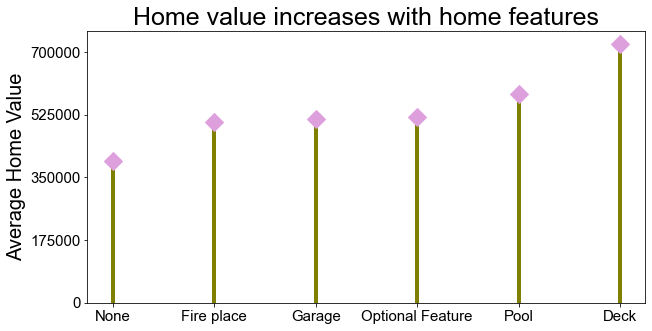

In [7]:
# obtain lolipop plot
e.get_loliplot(train)

#### Homes with a deck have a higher median home value than any other feature. Homes that have no characteristic have the the lowest median home value.

**I will now conduct a T-test to test for a significant difference between the mean home value of homes with  optional features (such as: garage, fireplace,pool,deck) is greater thatn the mean home value  of homes with no optional features**

* The confidence interval is 95%
* Alpha is set to 0.05
* p/2 value will be compared to alpha


$H_0$: Mean home value of homes with optional featues <= mean home value of homes with no optional features 

$H_a$: Mean home value of homes with optional featues > mean home value of homes with no optional features 

In [8]:
e.get_ttest_optionalfeature(train)

t-stat 28.8315
p-value 0.0


The p-value/2 is less than the alpha. **There is evidence to support that homes that have at least one of the following feature: garage, fireplace, pool,deck on average have a higher home value.** Based on this statistical finding I believe that optional features is a driver of home value.Adding an encoded version of this feature to the model will likely increase the model ability to predict home value.

# Does more house equal more home value?


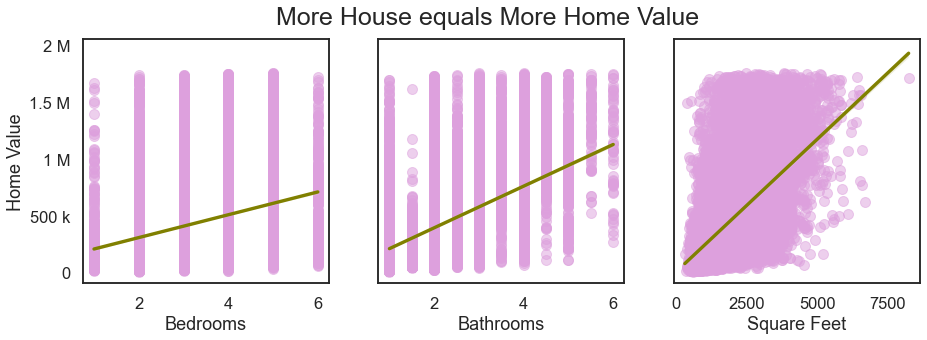

In [9]:
# obtain bed, bath and squarfeet graph
e.get_regplot_more_house(train)

#### It clear that more bedrooms , more bathrooms and more square feet space drives the home value up.

 # Does county make a difference in home value?
    FIPS     6111: Ventura County    6059: Orange County    6037: Los Angeles County

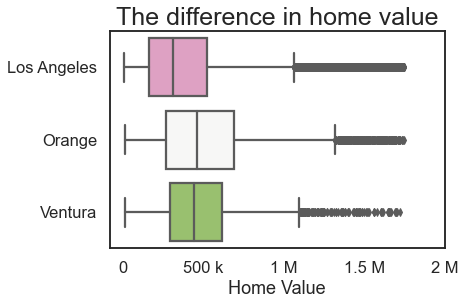

In [10]:
# obtain counties and home value box_plot
e.get_boxplot_county_vs_homevalue(train)

* **It seems that different counties have a diffirent home value mean.** Orange county homes have a slightly larger mean home value. Los Angeles county homes have the lowest mean home value.

**I will now conduct an anova test to test for a significant differences between the mean of the three different counties**

* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha


$H_0$: There is  two or more counties that have the same home value mean. 

$H_a$: Mean home value of the 3 diffirent counties is not the same

In [11]:
# obtain anova test for county vs home_value
e.get_anovatest_county_vs_homevalue(train)

t-stat 391.4815270923903
p-value 2.0078897820183972e-168


The p-value is less than alpha. There is evidence to support that the three counties have diffirent home value mean. Based on this statistical finding I believe that county location is a driver of home value. Adding an encoded version of this feature to the model will likely improve the model ability to predict home value.

# Is home age a driver of home value?

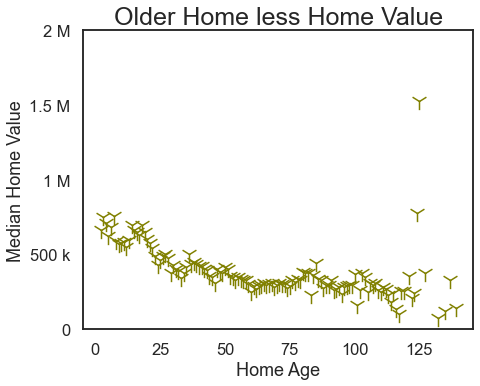

In [12]:
# obtain home age vs home value scatterplot
e.home_scatterplot(train)

* **It seems that there is a relationship between home age and median home value.** The older the home the lower the median age; there are exeptions to this observation.

**I will now conduct pearsonr test to test for a relationship  between the median home value and home age.**

* The confidence interval is 95%
* Alpha is set to 0.05
* p value will be compared to alpha

$H_0$: There is **no linear correlation** between the median home value and home age.

$H_a$: There **is a linear relationship** between the median home value and home age



In [13]:
# obtrain pearsonr test for home_value vs home_age
e.get_pearsonr_homevalue_vs_homeage(train)

correlation -0.24472152550019294
p-value 0.0


The p-value is less than alpha. There is evidence to support that there is a relationship between home value and home age. While it is a weak-negative relatiohsip I believe that adding it to my model will hep improve the models ability to predict.

# Exploration Summary

* Homes with a deck feature are among have a higher average home value.
* Homes with one ore more optional features(fireplace, pool, deck, garage) have a higher home value than homes with no optional features.
* County location of the home is a driver of home value.
* Home value has a correlation with home age.

# Features that will be included in my model

* All features selected seem to have and influence on home value
* **Square feet**  
* **Bathrooms**  
* **Bedrooms**
* **Home Age**
* **County**
* **optional_features**


# Features that will be not included in my model

* **yearbuilt** redundant information since it is used to calculate home age.
* **'Fire place','Garage','Pool','Deck'** since the information will be included in the model through optional_feature.

In [14]:
train.columns

Index(['home_value', 'squarefeet', 'bathrooms', 'bedrooms', 'yearbuilt',
       'fireplace', 'deck', 'pool', 'garage', 'county', 'home_age',
       'optional_features', 'los_angeles_county', 'orange_county',
       'ventura_county'],
      dtype='object')

# Modeling:

# Prepare  data for models

In [15]:
# prepare data for modeling
X_train, y_train, X_validate, y_validate, X_test, y_test = m.model_data_prep(train, validate, test)

In [16]:
X_train

,squarefeet,bathrooms,bedrooms,home_age,optional_features,los_angeles_county,orange_county,ventura_county
32899,0.091309,0.0,0.2,0.664234,0,1,0,0
4511,0.179600,0.2,0.4,0.204380,0,1,0,0
29470,0.193686,0.2,0.6,0.306569,0,0,1,0
15398,0.286882,0.4,0.6,0.153285,1,1,0,0
14156,0.075714,0.2,0.2,0.474453,0,1,0,0
...,...,...,...,...,...,...,...,...
23414,0.143378,0.4,0.4,0.313869,0,1,0,0
39632,0.254056,0.4,0.8,0.306569,0,0,1,0
47144,0.161238,0.2,0.2,0.445255,0,1,0,0
45444,0.192932,0.2,0.4,0.437956,0,0,1,0


# Model

# OLS

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:


#scores.loc[len(scores.index)] = [key, f, RMSE_baseline, RMSE, R2, RMSE_val, R2_val, diff]

In [19]:
# set up dataframe for predictions, add actual values
train_pred = pd.DataFrame({
    'actual': train.home_value
}) 
validate_pred = pd.DataFrame({
    'actual': validate.home_value
}) 

## Baseline

In [20]:
# add a baseline model
train_pred['baseline_mean'] = train.home_value.mean()
validate_pred['baseline_mean'] = validate.home_value.mean()

train_pred['baseline_median'] = train.home_value.median()
validate_pred['baseline_median'] = validate.home_value.median()

In [21]:
train.columns

Index(['home_value', 'squarefeet', 'bathrooms', 'bedrooms', 'yearbuilt',
       'fireplace', 'deck', 'pool', 'garage', 'county', 'home_age',
       'optional_features', 'los_angeles_county', 'orange_county',
       'ventura_county'],
      dtype='object')

# custom

In [26]:
custom = ['squarefeet','bathrooms','bedrooms','home_age','orange_county','optional_features']

In [27]:

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[custom], y_train)
# 3. use the thing (make predictions)

train_pred['CUS_Model'] = lm.predict(X_train[custom])
validate_pred['CUS_Model'] = lm.predict(X_validate[custom])

# OLS

In [28]:

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train, y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model'] = lm.predict(X_train)
validate_pred['OLS_Model'] = lm.predict(X_validate)

In [29]:
train_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model
32899,346258.0,435017.576015,362951.0,281248.501267,281344.0
4511,520000.0,435017.576015,362951.0,365551.054048,361216.0
29470,217589.0,435017.576015,362951.0,402743.610802,405760.0
15398,210507.0,435017.576015,362951.0,569253.569955,559360.0
14156,294263.0,435017.576015,362951.0,279104.518454,278528.0
...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,372212.250889,370432.0
39632,113492.0,435017.576015,362951.0,507592.674839,511232.0
47144,189810.0,435017.576015,362951.0,433546.246590,432896.0
45444,299124.0,435017.576015,362951.0,486228.332305,491776.0


In [30]:
validate_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model
39225,389492.0,425537.874306,352079.0,285183.649583,283392.0
15407,318000.0,425537.874306,352079.0,510901.023850,501248.0
37785,248333.0,425537.874306,352079.0,431983.294778,437760.0
30638,457701.0,425537.874306,352079.0,549007.099261,546560.0
30573,369895.0,425537.874306,352079.0,508343.024320,523008.0
...,...,...,...,...,...
26970,465000.0,425537.874306,352079.0,335937.063893,334080.0
18965,467781.0,425537.874306,352079.0,504988.018595,498944.0
2798,193418.0,425537.874306,352079.0,347131.383266,342784.0
10674,76597.0,425537.874306,352079.0,315153.582871,307712.0


## Using Kbest 7 features

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 7 features
f_selector = SelectKBest(f_regression, k=7)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()


In [32]:
X_train[f_feature]

,squarefeet,bathrooms,bedrooms,home_age,optional_features,los_angeles_county,orange_county
32899,0.091309,0.0,0.2,0.664234,0,1,0
4511,0.179600,0.2,0.4,0.204380,0,1,0
29470,0.193686,0.2,0.6,0.306569,0,0,1
15398,0.286882,0.4,0.6,0.153285,1,1,0
14156,0.075714,0.2,0.2,0.474453,0,1,0
...,...,...,...,...,...,...,...
23414,0.143378,0.4,0.4,0.313869,0,1,0
39632,0.254056,0.4,0.8,0.306569,0,0,1
47144,0.161238,0.2,0.2,0.445255,0,1,0
45444,0.192932,0.2,0.4,0.437956,0,0,1


In [33]:
X_train.columns.to_list()

['squarefeet',
 'bathrooms',
 'bedrooms',
 'home_age',
 'optional_features',
 'los_angeles_county',
 'orange_county',
 'ventura_county']

In [34]:
# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f7'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f7'] = lm.predict(X_validate[f_feature])

In [35]:
train_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model,OLS_Model_f7
32899,346258.0,435017.576015,362951.0,281248.501267,281344.0,282028.096328
4511,520000.0,435017.576015,362951.0,365551.054048,361216.0,360342.187359
29470,217589.0,435017.576015,362951.0,402743.610802,405760.0,405530.922007
15398,210507.0,435017.576015,362951.0,569253.569955,559360.0,557036.072715
14156,294263.0,435017.576015,362951.0,279104.518454,278528.0,278350.929020
...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,372212.250889,370432.0,369988.737804
39632,113492.0,435017.576015,362951.0,507592.674839,511232.0,511338.432411
47144,189810.0,435017.576015,362951.0,433546.246590,432896.0,432435.678467
45444,299124.0,435017.576015,362951.0,486228.332305,491776.0,491470.921308


In [36]:
# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_cus'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_cus'] = lm.predict(X_validate[f_feature])

# Using Kbest 4 features

In [37]:
# parameters: f_regression stats test, give me 4 features
f_selector = SelectKBest(f_regression, k=4)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f4'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f4'] = lm.predict(X_validate[f_feature])

In [38]:
X_train[f_feature]

,squarefeet,bathrooms,bedrooms,home_age
32899,0.091309,0.0,0.2,0.664234
4511,0.179600,0.2,0.4,0.204380
29470,0.193686,0.2,0.6,0.306569
15398,0.286882,0.4,0.6,0.153285
14156,0.075714,0.2,0.2,0.474453
...,...,...,...,...
23414,0.143378,0.4,0.4,0.313869
39632,0.254056,0.4,0.8,0.306569
47144,0.161238,0.2,0.2,0.445255
45444,0.192932,0.2,0.4,0.437956


In [39]:
train_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model,OLS_Model_f7,OLS_Model_cus,OLS_Model_f4
32899,346258.0,435017.576015,362951.0,281248.501267,281344.0,282028.096328,282028.096328,287241.703373
4511,520000.0,435017.576015,362951.0,365551.054048,361216.0,360342.187359,360342.187359,395767.363321
29470,217589.0,435017.576015,362951.0,402743.610802,405760.0,405530.922007,405530.922007,370853.817907
15398,210507.0,435017.576015,362951.0,569253.569955,559360.0,557036.072715,557036.072715,584901.850029
14156,294263.0,435017.576015,362951.0,279104.518454,278528.0,278350.929020,278350.929020,292016.844716
...,...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,372212.250889,370432.0,369988.737804,369988.737804,394404.737720
39632,113492.0,435017.576015,362951.0,507592.674839,511232.0,511338.432411,511338.432411,477067.644446
47144,189810.0,435017.576015,362951.0,433546.246590,432896.0,432435.678467,432435.678467,450191.028533
45444,299124.0,435017.576015,362951.0,486228.332305,491776.0,491470.921308,491470.921308,446507.992826


# Using Kbest 3 features

In [40]:
# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=3)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

# 1. make the thing
lm = LinearRegression()
# 2. fit the thing
lm.fit(X_train[f_feature], y_train)
# 3. use the thing (make predictions)

train_pred['OLS_Model_f3'] = lm.predict(X_train[f_feature])
validate_pred['OLS_Model_f3'] = lm.predict(X_validate[f_feature])

In [41]:
X_train[f_feature]

,squarefeet,bathrooms,bedrooms
32899,0.091309,0.0,0.2
4511,0.179600,0.2,0.4
29470,0.193686,0.2,0.6
15398,0.286882,0.4,0.6
14156,0.075714,0.2,0.2
...,...,...,...
23414,0.143378,0.4,0.4
39632,0.254056,0.4,0.8
47144,0.161238,0.2,0.2
45444,0.192932,0.2,0.4


In [42]:
train_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model,OLS_Model_f7,OLS_Model_cus,OLS_Model_f4,OLS_Model_f3
32899,346258.0,435017.576015,362951.0,281248.501267,281344.0,282028.096328,282028.096328,287241.703373,270166.900089
4511,520000.0,435017.576015,362951.0,365551.054048,361216.0,360342.187359,360342.187359,395767.363321,417441.926284
29470,217589.0,435017.576015,362951.0,402743.610802,405760.0,405530.922007,405530.922007,370853.817907,379885.806624
15398,210507.0,435017.576015,362951.0,569253.569955,559360.0,557036.072715,557036.072715,584901.850029,600204.452655
14156,294263.0,435017.576015,362951.0,279104.518454,278528.0,278350.929020,278350.929020,292016.844716,287196.223914
...,...,...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,372212.250889,370432.0,369988.737804,369988.737804,394404.737720,395928.534685
39632,113492.0,435017.576015,362951.0,507592.674839,511232.0,511338.432411,511338.432411,477067.644446,474987.157062
47144,189810.0,435017.576015,362951.0,433546.246590,432896.0,432435.678467,432435.678467,450191.028533,447007.482989
45444,299124.0,435017.576015,362951.0,486228.332305,491776.0,491470.921308,491470.921308,446507.992826,442353.681375


# OLS_ RFE  features = 7  

In [43]:
columns = X_train.columns.to_list()

In [44]:
X_train

,squarefeet,bathrooms,bedrooms,home_age,optional_features,los_angeles_county,orange_county,ventura_county
32899,0.091309,0.0,0.2,0.664234,0,1,0,0
4511,0.179600,0.2,0.4,0.204380,0,1,0,0
29470,0.193686,0.2,0.6,0.306569,0,0,1,0
15398,0.286882,0.4,0.6,0.153285,1,1,0,0
14156,0.075714,0.2,0.2,0.474453,0,1,0,0
...,...,...,...,...,...,...,...,...
23414,0.143378,0.4,0.4,0.313869,0,1,0,0
39632,0.254056,0.4,0.8,0.306569,0,0,1,0
47144,0.161238,0.2,0.2,0.445255,0,1,0,0
45444,0.192932,0.2,0.4,0.437956,0,0,1,0


In [45]:
from sklearn.feature_selection import RFE
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=7)
rfe.fit(X_train, y_train)
print('selected top 7 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe7'] = lm.predict(X_train_rfe)

selected top 7 features: Index(['squarefeet', 'bathrooms', 'bedrooms', 'home_age', 'los_angeles_county',
       'orange_county', 'ventura_county'],
      dtype='object')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [46]:
# 3. Make predictions


X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe7'] = lm.predict(X_validate_rfe)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [47]:
train_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model,OLS_Model_f7,OLS_Model_cus,OLS_Model_f4,OLS_Model_f3,OLS_rfe7
32899,346258.0,435017.576015,362951.0,281248.501267,281344.0,282028.096328,282028.096328,287241.703373,270166.900089,283584.0
4511,520000.0,435017.576015,362951.0,365551.054048,361216.0,360342.187359,360342.187359,395767.363321,417441.926284,360960.0
29470,217589.0,435017.576015,362951.0,402743.610802,405760.0,405530.922007,405530.922007,370853.817907,379885.806624,411392.0
15398,210507.0,435017.576015,362951.0,569253.569955,559360.0,557036.072715,557036.072715,584901.850029,600204.452655,546752.0
14156,294263.0,435017.576015,362951.0,279104.518454,278528.0,278350.929020,278350.929020,292016.844716,287196.223914,279296.0
...,...,...,...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,372212.250889,370432.0,369988.737804,369988.737804,394404.737720,395928.534685,371520.0
39632,113492.0,435017.576015,362951.0,507592.674839,511232.0,511338.432411,511338.432411,477067.644446,474987.157062,518656.0
47144,189810.0,435017.576015,362951.0,433546.246590,432896.0,432435.678467,432435.678467,450191.028533,447007.482989,433920.0
45444,299124.0,435017.576015,362951.0,486228.332305,491776.0,491470.921308,491470.921308,446507.992826,442353.681375,497664.0


# OLS_RFE 4 features

In [48]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=4)
rfe.fit(X_train, y_train)
print('selected top 4 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe4'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe4'] = lm.predict(X_validate_rfe)

selected top 4 features: Index(['squarefeet', 'los_angeles_county', 'orange_county', 'ventura_county'], dtype='object')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# OLS_RFE 3 features

In [49]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=3)
rfe.fit(X_train, y_train)
print('selected top 3 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe3'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe3'] = lm.predict(X_validate_rfe)

selected top 3 features: Index(['los_angeles_county', 'orange_county', 'ventura_county'], dtype='object')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# OLS_RFE 2 features

In [50]:
lm = LinearRegression()


# 1. Transform our X
rfe = RFE(lm, n_features_to_select=2)
rfe.fit(X_train, y_train)
print('selected top 2 features:', X_train.columns[rfe.support_])
X_train_rfe = rfe.transform(X_train)
# 2. Use the transformed x in our model
lm.fit(X_train_rfe, y_train)
#convert to DF
X_train_rfe = pd.DataFrame(X_train_rfe, columns = X_train.columns[rfe.support_], index = X_train.index)

train_pred['OLS_rfe2'] = lm.predict(X_train_rfe)
X_validate_rfe = rfe.transform(X_validate)
#Convert to df
X_validate_rfe = pd.DataFrame(X_validate_rfe, columns = X_validate.columns[rfe.support_], index = X_validate.index)

validate_pred['OLS_rfe2'] = lm.predict(X_validate_rfe)

selected top 2 features: Index(['orange_county', 'ventura_county'], dtype='object')


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [51]:
train_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model,OLS_Model_f7,OLS_Model_cus,OLS_Model_f4,OLS_Model_f3,OLS_rfe7,OLS_rfe4,OLS_rfe3,OLS_rfe2
32899,346258.0,435017.576015,362951.0,281248.501267,281344.0,282028.096328,282028.096328,287241.703373,270166.900089,283584.0,236032.0,395250.0,394939.871862
4511,520000.0,435017.576015,362951.0,365551.054048,361216.0,360342.187359,360342.187359,395767.363321,417441.926284,360960.0,395904.0,395250.0,394939.871862
29470,217589.0,435017.576015,362951.0,402743.610802,405760.0,405530.922007,405530.922007,370853.817907,379885.806624,411392.0,474496.0,515033.0,515670.961094
15398,210507.0,435017.576015,362951.0,569253.569955,559360.0,557036.072715,557036.072715,584901.850029,600204.452655,546752.0,590208.0,395250.0,394939.871862
14156,294263.0,435017.576015,362951.0,279104.518454,278528.0,278350.929020,278350.929020,292016.844716,287196.223914,279296.0,207808.0,395250.0,394939.871862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,372212.250889,370432.0,369988.737804,369988.737804,394404.737720,395928.534685,371520.0,330368.0,395250.0,394939.871862
39632,113492.0,435017.576015,362951.0,507592.674839,511232.0,511338.432411,511338.432411,477067.644446,474987.157062,518656.0,583808.0,515033.0,515670.961094
47144,189810.0,435017.576015,362951.0,433546.246590,432896.0,432435.678467,432435.678467,450191.028533,447007.482989,433920.0,362688.0,395250.0,394939.871862
45444,299124.0,435017.576015,362951.0,486228.332305,491776.0,491470.921308,491470.921308,446507.992826,442353.681375,497664.0,473152.0,515033.0,515670.961094


# Polynomial

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# Degree 2

In [53]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d2'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d2'] = lm.predict(X_validate_poly)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Degree 2 interactions ONLY

In [54]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['Ipoly_d2'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['Ipoly_d2'] = lm.predict(X_validate_poly)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
validate_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model,OLS_Model_f7,OLS_Model_cus,OLS_Model_f4,OLS_Model_f3,OLS_rfe7,OLS_rfe4,OLS_rfe3,OLS_rfe2,poly_d2,Ipoly_d2
39225,389492.0,425537.874306,352079.0,285183.649583,283392.0,283454.341879,283454.341879,302459.417506,299698.630995,284864.0,281856.0,395250.0,394939.871862,281088.0,286464.0
15407,318000.0,425537.874306,352079.0,510901.023850,501248.0,499312.573008,499312.573008,523488.999859,534634.833123,489024.0,526656.0,395250.0,394939.871862,459776.0,465152.0
37785,248333.0,425537.874306,352079.0,431983.294778,437760.0,436744.395250,436744.395250,391972.952115,396478.923135,441792.0,366784.0,515033.0,515670.961094,375040.0,366848.0
30638,457701.0,425537.874306,352079.0,549007.099261,546560.0,545668.030996,545668.030996,577832.689116,586291.946230,547584.0,514816.0,395250.0,394939.871862,510208.0,504064.0
30573,369895.0,425537.874306,352079.0,508343.024320,523008.0,528813.413323,528813.413323,525672.433400,547090.710668,528768.0,552192.0,485197.0,485531.461380,567808.0,572160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,465000.0,425537.874306,352079.0,335937.063893,334080.0,334235.160379,334235.160379,353956.189902,350697.223964,335872.0,331264.0,395250.0,394939.871862,326144.0,327168.0
18965,467781.0,425537.874306,352079.0,504988.018595,498944.0,497457.959756,497457.959756,502921.973471,489935.157670,487680.0,421440.0,395250.0,394939.871862,529152.0,523008.0
2798,193418.0,425537.874306,352079.0,347131.383266,342784.0,341582.294058,341582.294058,378180.732265,402400.866606,342016.0,381376.0,395250.0,394939.871862,274432.0,275712.0
10674,76597.0,425537.874306,352079.0,315153.582871,307712.0,306169.555700,306169.555700,310144.450772,311059.781088,294528.0,275712.0,395250.0,394939.871862,372224.0,360704.0


# Degree 3

In [56]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d3'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d3'] = lm.predict(X_validate_poly)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DEGREE 3 Interactions Only

In [57]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['Ipoly_d3'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['Ipoly_d3'] = lm.predict(X_validate_poly)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Degree 4

In [58]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['poly_d4'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['poly_d4'] = lm.predict(X_validate_poly)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DEGREE 4 interaction Only

In [59]:
# 1. Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly.fit(X_train)
X_train_poly = pd.DataFrame(
    poly.transform(X_train),
    columns=poly.get_feature_names(X_train.columns),
    index=train.index,
)
X_train_poly.head()

# 2. Use the features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


train_pred['Ipoly_d4'] = lm.predict(X_train_poly)

X_validate_poly = poly.transform(X_validate)
validate_pred['Ipoly_d4'] = lm.predict(X_validate_poly)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Evaluate Models

In [60]:
train_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model,OLS_Model_f7,OLS_Model_cus,OLS_Model_f4,OLS_Model_f3,OLS_rfe7,OLS_rfe4,OLS_rfe3,OLS_rfe2,poly_d2,Ipoly_d2,poly_d3,Ipoly_d3,poly_d4,Ipoly_d4
32899,346258.0,435017.576015,362951.0,281248.501267,281344.0,282028.096328,282028.096328,287241.703373,270166.900089,283584.0,236032.0,395250.0,394939.871862,330496.0,332288.0,291968.0,332288.0,300672.0,332288.0
4511,520000.0,435017.576015,362951.0,365551.054048,361216.0,360342.187359,360342.187359,395767.363321,417441.926284,360960.0,395904.0,395250.0,394939.871862,298752.0,298240.0,269184.0,298240.0,272960.0,298240.0
29470,217589.0,435017.576015,362951.0,402743.610802,405760.0,405530.922007,405530.922007,370853.817907,379885.806624,411392.0,474496.0,515033.0,515670.961094,425472.0,420608.0,398336.0,420608.0,372928.0,420608.0
15398,210507.0,435017.576015,362951.0,569253.569955,559360.0,557036.072715,557036.072715,584901.850029,600204.452655,546752.0,590208.0,395250.0,394939.871862,512000.0,513280.0,488832.0,513280.0,485312.0,513280.0
14156,294263.0,435017.576015,362951.0,279104.518454,278528.0,278350.929020,278350.929020,292016.844716,287196.223914,279296.0,207808.0,395250.0,394939.871862,278784.0,274944.0,271232.0,274944.0,272064.0,274944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23414,73891.0,435017.576015,362951.0,372212.250889,370432.0,369988.737804,369988.737804,394404.737720,395928.534685,371520.0,330368.0,395250.0,394939.871862,350720.0,346880.0,330880.0,346880.0,309568.0,346880.0
39632,113492.0,435017.576015,362951.0,507592.674839,511232.0,511338.432411,511338.432411,477067.644446,474987.157062,518656.0,583808.0,515033.0,515670.961094,493568.0,499456.0,407680.0,499456.0,416448.0,499456.0
47144,189810.0,435017.576015,362951.0,433546.246590,432896.0,432435.678467,432435.678467,450191.028533,447007.482989,433920.0,362688.0,395250.0,394939.871862,406784.0,401920.0,419712.0,401920.0,414720.0,401920.0
45444,299124.0,435017.576015,362951.0,486228.332305,491776.0,491470.921308,491470.921308,446507.992826,442353.681375,497664.0,473152.0,515033.0,515670.961094,393728.0,391168.0,406400.0,391168.0,358848.0,391168.0


In [61]:
def evaluate_metrics(df, col,actual):
    MSE = mean_squared_error(actual, df[col])
    SSE = MSE * len(df)
    RMSE = MSE ** .5
    ESS = ((df[col] - actual.mean())**2).sum()
    TSS = ESS + SSE
    R2 = explained_variance_score(actual, df[col])
    return MSE, SSE, RMSE,ESS, TSS,R2

In [62]:
col = train_pred.columns.to_list()

In [63]:
from sklearn.metrics import mean_squared_error,explained_variance_score
metric_df = pd.DataFrame(columns =['model','MSE','SSE','RMSE','ESS','TSS','R2'])
for i in col:
    MSE,SSE, RMSE, ESS, TSS, R2 = evaluate_metrics(train_pred, i , y_train)
    # sklearn.metrics.explained_variance_score

    metric_df= metric_df.append({
                    'model': i,
                    'MSE':MSE,
                     'SSE':SSE,
                     'RMSE':RMSE,
                     'ESS':ESS,
                     'TSS':TSS,
                     'R2':R2},ignore_index=True)
    

/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_2441/3387588801.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df= metric_df.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_2441/3387588801.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df= metric_df.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_2441/3387588801.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df= metric_df.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_2441/3387588801.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_df= metric_df.append({
/var/folders/gl/

In [64]:
metric_df

,model,MSE,SSE,RMSE,ESS,TSS,R2
0,actual,0.0,0.0,0.0,3119898990285849.0,3119898990285849.0,1.0
1,baseline_mean,110795802062.78096,3119898990285849.0,332860.033742,0.0,3119898990285849.0,0.0
2,baseline_median,115989393441.274048,3266145329912836.0,340572.155998,146246339626987.0625,3412391669539823.0,0.0
3,CUS_Model,72958472047.790451,2054437614393731.25,270108.259866,1065461375892135.125,3119898990285866.5,0.341505
4,OLS_Model,72894457872.566467,2052635039233599.25,269989.736606,1069518615148646.625,3122153654382246.0,0.342083
5,OLS_Model_f7,72889154770.632797,2052485709186249.0,269979.915495,1067413281099617.0,3119898990285866.0,0.342131
6,OLS_Model_cus,72889154770.632797,2052485709186249.0,269979.915495,1067413281099617.0,3119898990285866.0,0.342131
7,OLS_Model_f4,73745661127.296219,2076604071683534.25,271561.52365,1043294918602332.25,3119898990285866.5,0.3344
8,OLS_Model_f3,73971920691.957504,2082975314764831.25,271977.794483,1036923675521034.375,3119898990285865.5,0.332358
9,OLS_rfe7,72916411397.734253,2053253228548798.75,270030.389767,1067440811674536.5,3120694040223335.0,0.341885


In [65]:
metric_df[['model','RMSE','R2']]


,model,RMSE,R2
0,actual,0.0,1.0
1,baseline_mean,332860.033742,0.0
2,baseline_median,340572.155998,0.0
3,CUS_Model,270108.259866,0.341505
4,OLS_Model,269989.736606,0.342083
5,OLS_Model_f7,269979.915495,0.342131
6,OLS_Model_cus,269979.915495,0.342131
7,OLS_Model_f4,271561.52365,0.3344
8,OLS_Model_f3,271977.794483,0.332358
9,OLS_rfe7,270030.389767,0.341885


In [66]:
metric_df[['model','RMSE','R2']].sort_values(by='R2',ascending=False)

,model,RMSE,R2
0,actual,0.0,1.0
17,poly_d4,258806.443335,0.395458
15,poly_d3,260512.154144,0.387463
13,poly_d2,264334.878803,0.369357
16,Ipoly_d3,264575.334204,0.368207
14,Ipoly_d2,264575.334204,0.368207
18,Ipoly_d4,264575.334204,0.368207
6,OLS_Model_cus,269979.915495,0.342131
5,OLS_Model_f7,269979.915495,0.342131
4,OLS_Model,269989.736606,0.342083


In [81]:
metric_val['diff_RMSE']= metric_val[['RMSE']]- metric_df[['RMSE']]

In [82]:
metric_val['diff_R2']= metric_val[['R2']]- metric_df[['R2']]

In [83]:
# train - validate
1-200_000/250_000

0.19999999999999996

In [84]:
metric_val['%diff_RMSE']= 1-(metric_df[['RMSE']]/(metric_val[['RMSE']]+.000000000001))

In [85]:
metric_val[['model','RMSE','R2','diff_R2','diff_RMSE','%diff_RMSE']].sort_values(by='%diff_RMSE',ascending=False)

,model,RMSE,R2,diff_R2,diff_RMSE,%diff_RMSE
0,actual,0.0,1.0,0.0,0.0,1.0
17,poly_d4,256377.769054,0.387044,-0.008413,-2428.67428,-0.009473
2,baseline_median,335425.275724,0.0,0.0,-5146.880275,-0.015344
12,OLS_rfe2,322825.095882,0.027943,0.000888,-5501.185932,-0.017041
1,baseline_mean,327282.613929,0.0,0.0,-5577.419813,-0.017042
11,OLS_rfe3,322824.964808,0.027944,0.00089,-5501.592119,-0.017042
3,CUS_Model,264837.96959,0.346024,0.004519,-5270.290276,-0.0199
4,OLS_Model,264717.802182,0.346609,0.004526,-5271.934424,-0.019915
5,OLS_Model_f7,264704.440485,0.346687,0.004556,-5275.47501,-0.01993
6,OLS_Model_cus,264704.440485,0.346687,0.004556,-5275.47501,-0.01993


In [72]:
col = validate_pred.columns.to_list()
metric_val = pd.DataFrame(columns =['model','MSE','SSE','RMSE','ESS','TSS','R2'])
for i in col:
    MSE,SSE, RMSE, ESS, TSS, R2 = evaluate_metrics(validate_pred, i , y_validate)
    metric_val= metric_val.append({
                    'model': i,
                    'MSE':MSE,
                     'SSE':SSE,
                     'RMSE':RMSE,
                     'ESS':ESS,
                     'TSS':TSS,
                     'R2':R2},ignore_index=True)
    


/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_2441/128521939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_val= metric_val.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_2441/128521939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_val= metric_val.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_2441/128521939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_val= metric_val.append({
/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_2441/128521939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metric_val= metric_val.append({
/var/folders

In [73]:
metric_val[['model','RMSE','R2']].sort_values(by='R2',ascending=False)

,model,RMSE,R2
0,actual,0.0,1.0
15,poly_d3,255389.381622,0.391662
17,poly_d4,256377.769054,0.387044
13,poly_d2,257372.760267,0.38237
16,Ipoly_d3,257777.266937,0.380303
14,Ipoly_d2,257777.266937,0.380303
18,Ipoly_d4,257777.266937,0.380303
6,OLS_Model_cus,264704.440485,0.346687
5,OLS_Model_f7,264704.440485,0.346687
4,OLS_Model,264717.802182,0.346609


In [74]:
validate_pred

,actual,baseline_mean,baseline_median,CUS_Model,OLS_Model,OLS_Model_f7,OLS_Model_cus,OLS_Model_f4,OLS_Model_f3,OLS_rfe7,OLS_rfe4,OLS_rfe3,OLS_rfe2,poly_d2,Ipoly_d2,poly_d3,Ipoly_d3,poly_d4,Ipoly_d4
39225,389492.0,425537.874306,352079.0,285183.649583,283392.0,283454.341879,283454.341879,302459.417506,299698.630995,284864.0,281856.0,395250.0,394939.871862,281088.0,286464.0,267648.0,286464.0,266496.0,286464.0
15407,318000.0,425537.874306,352079.0,510901.023850,501248.0,499312.573008,499312.573008,523488.999859,534634.833123,489024.0,526656.0,395250.0,394939.871862,459776.0,465152.0,439552.0,465152.0,418176.0,465152.0
37785,248333.0,425537.874306,352079.0,431983.294778,437760.0,436744.395250,436744.395250,391972.952115,396478.923135,441792.0,366784.0,515033.0,515670.961094,375040.0,366848.0,361984.0,366848.0,378304.0,366848.0
30638,457701.0,425537.874306,352079.0,549007.099261,546560.0,545668.030996,545668.030996,577832.689116,586291.946230,547584.0,514816.0,395250.0,394939.871862,510208.0,504064.0,476032.0,504064.0,471744.0,504064.0
30573,369895.0,425537.874306,352079.0,508343.024320,523008.0,528813.413323,528813.413323,525672.433400,547090.710668,528768.0,552192.0,485197.0,485531.461380,567808.0,572160.0,558208.0,572160.0,535872.0,572160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,465000.0,425537.874306,352079.0,335937.063893,334080.0,334235.160379,334235.160379,353956.189902,350697.223964,335872.0,331264.0,395250.0,394939.871862,326144.0,327168.0,319360.0,327168.0,317056.0,327168.0
18965,467781.0,425537.874306,352079.0,504988.018595,498944.0,497457.959756,497457.959756,502921.973471,489935.157670,487680.0,421440.0,395250.0,394939.871862,529152.0,523008.0,542848.0,523008.0,525440.0,523008.0
2798,193418.0,425537.874306,352079.0,347131.383266,342784.0,341582.294058,341582.294058,378180.732265,402400.866606,342016.0,381376.0,395250.0,394939.871862,274432.0,275712.0,252288.0,275712.0,254656.0,275712.0
10674,76597.0,425537.874306,352079.0,315153.582871,307712.0,306169.555700,306169.555700,310144.450772,311059.781088,294528.0,275712.0,395250.0,394939.871862,372224.0,360704.0,364928.0,360704.0,377024.0,360704.0


In [75]:
df['yhat_baseline'] = df['y'].mean()
df['yhat'] = ols_model.predict(df[['x']])

df['residual'] = df['yhat'] - df['y']
df['residual_baseline'] = df['yhat_baseline'] - df['y']

df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

KeyError: 'y'

In [76]:
def plot_residuals(y, yhat,df):
    '''
    plot_residuals takis in acutal value of target y and predicted value and returns a scatter plot of reiduals.
    y: targets acutal value
    yhat: predicted value or target
    '''
    # calculate residauals
    residuals = y - df[yhat]
    
    # create scatter plot
    plt.scatter(x=y, y=residuals)

    # create labels for axis and title
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')

    # show plot
    plt.show()

In [77]:
col = train_pred.columns.to_list()
col

['actual',
 'baseline_mean',
 'baseline_median',
 'CUS_Model',
 'OLS_Model',
 'OLS_Model_f7',
 'OLS_Model_cus',
 'OLS_Model_f4',
 'OLS_Model_f3',
 'OLS_rfe7',
 'OLS_rfe4',
 'OLS_rfe3',
 'OLS_rfe2',
 'poly_d2',
 'Ipoly_d2',
 'poly_d3',
 'Ipoly_d3',
 'poly_d4',
 'Ipoly_d4']

actual


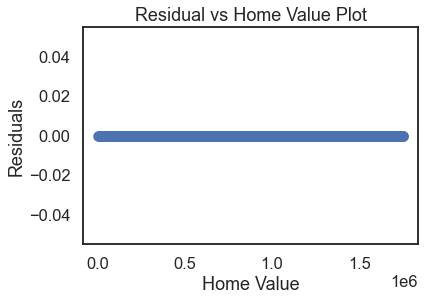

baseline_mean


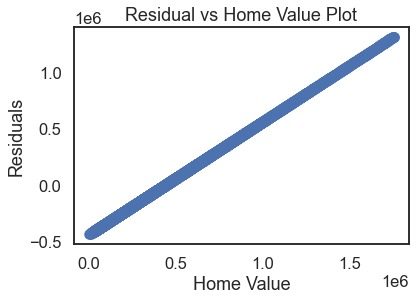

baseline_median


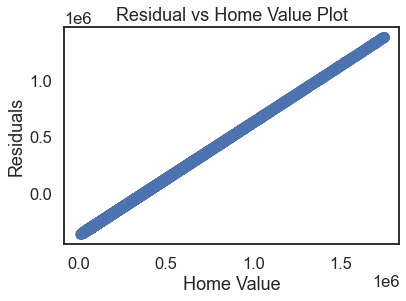

CUS_Model


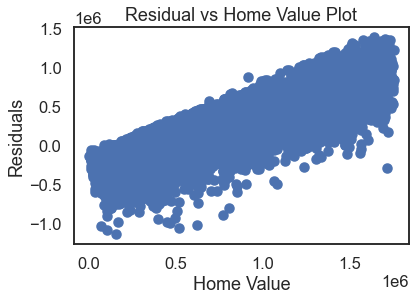

OLS_Model


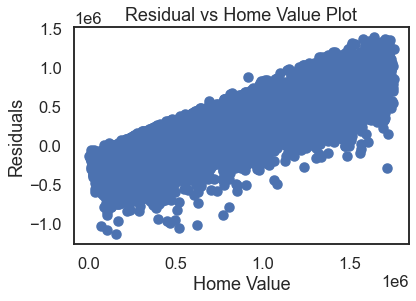

OLS_Model_f7


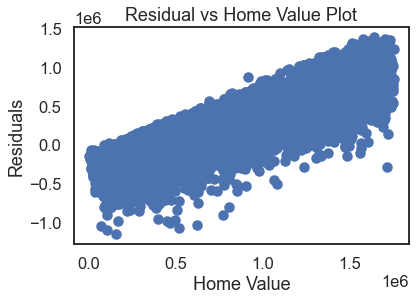

OLS_Model_cus


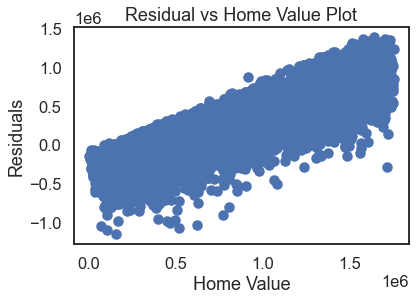

OLS_Model_f4


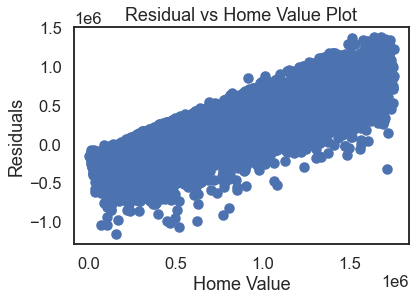

OLS_Model_f3


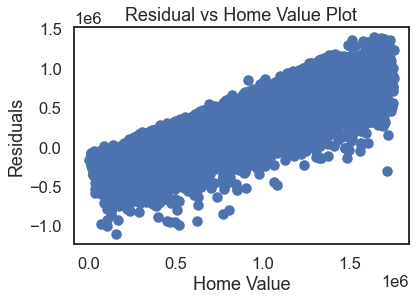

OLS_rfe7


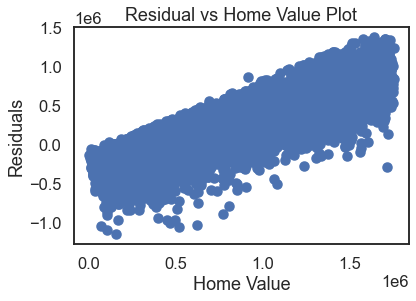

OLS_rfe4


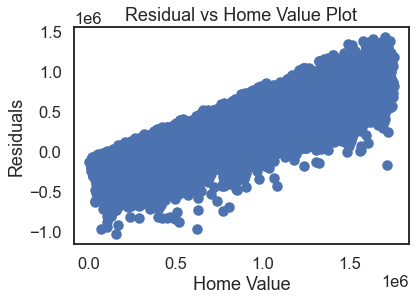

OLS_rfe3


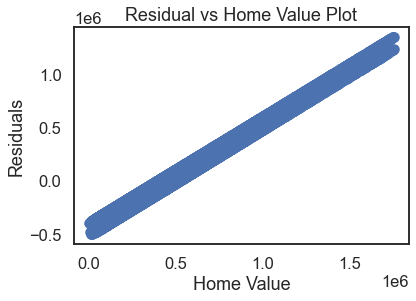

OLS_rfe2


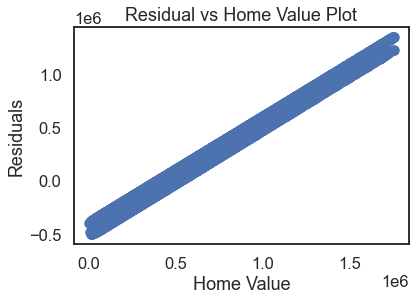

poly_d2


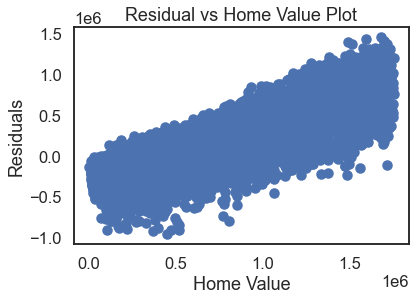

Ipoly_d2


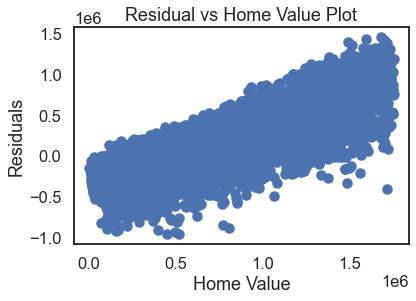

poly_d3


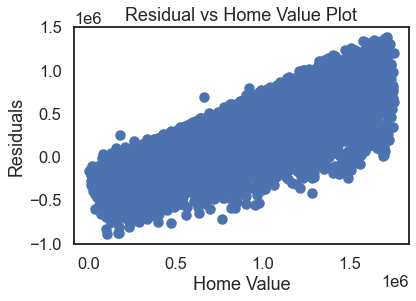

Ipoly_d3


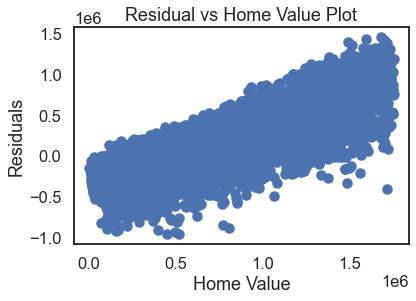

poly_d4


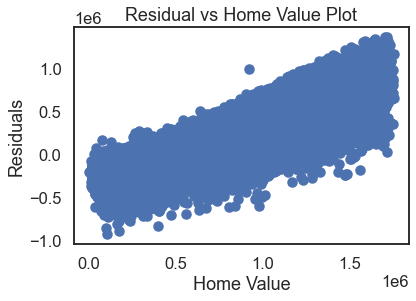

Ipoly_d4


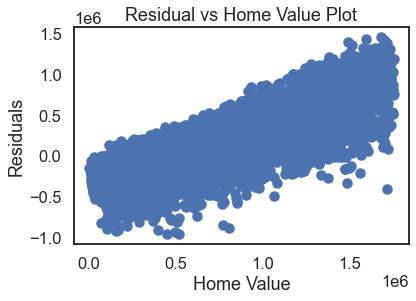

In [78]:
for i in col:  
    print(i)
    plot_residuals(y_train, i, train_pred)





In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def regression_errors(actual, yhat,df):

    residual = actual - df[yhat]
    
    mse = mean_squared_error(actual, df[yhat])
    sse = (residual **2).sum()
    rmse = sqrt(mse)
    tss = ((actual - df[yhat].mean()) ** 2).sum()
    ess = ((df[yhat] - actual.mean()) ** 2).sum()
    print(f""" 
    MSE: {round(mse,2)}
    SSE: {round(sse,2)}
    RMSE: {round(rmse,2)}
    TSS: {round(tss,2)}
    ESS: {round(ess,2)}
    """)

In [80]:
for i in col:  
    print(i)
    regression_errors(y_train, i, train_pred)



actual
 
    MSE: 0.0
    SSE: 0.0
    RMSE: 0.0
    TSS: 3119898990285849.0
    ESS: 3119898990285849.0
    
baseline_mean
 
    MSE: 110795802062.78
    SSE: 3119898990285849.0
    RMSE: 332860.03
    TSS: 3119898990285849.5
    ESS: 0.0
    
baseline_median
 
    MSE: 115989393441.27
    SSE: 3266145329912836.0
    RMSE: 340572.16
    TSS: 3266145329912836.0
    ESS: 146246339626987.06
    
CUS_Model
 
    MSE: 72958472047.79
    SSE: 2054437614393731.2
    RMSE: 270108.26
    TSS: 3119898990285849.5
    ESS: 1065461375892135.2
    
OLS_Model
 
    MSE: 72894457872.57
    SSE: 2052635039233599.0
    RMSE: 269989.74
    TSS: 3119899181115885.5
    ESS: 1069518615148646.5
    
OLS_Model_f7
 
    MSE: 72889154770.63
    SSE: 2052485709186248.8
    RMSE: 269979.92
    TSS: 3119898990285849.5
    ESS: 1067413281099617.0
    
OLS_Model_cus
 
    MSE: 72889154770.63
    SSE: 2052485709186248.8
    RMSE: 269979.92
    TSS: 3119898990285849.5
    ESS: 1067413281099617.0
    
OLS_Model_f4
 
 

* metric

In [ ]:
# prep data for modeling
x_train,y_train,x_validate,y_validate, x_test, y_test = m.model_prep(train,validate,test)

**The ....** 

# Comparing Models

* All ....

# Model on Test data

In [ ]:
m.get_logit_model(x_train,y_train,x_test,y_test, True)

## Modeling Summary

* A
* B

# Conclusion

## Exploration



* A
* B

## Modeling

**The final model performed....**

## Recommendations

* A
* B
* C

## Next Steps

* A
* B
* C